In [164]:
!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

## Install SB packages
import sys
!pip install statsbombpy

## Import free data
from statsbombpy import sb

In [5]:
## Sample code
sb.competitions()
# For Leverkusen - sb.matches(competition_id=9, season_id=281)
# For Euro 2024 matches - sb.matches(competition_id=55, season_id=282)

## These output matches with match_id that we can use to pull match lineups / events

/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


In [153]:
## Pull lineups for all spain matches
euro_matches = sb.matches(competition_id=55, season_id=282)
spain_matches = euro_matches.loc[(euro_matches['home_team'] == 'Spain') | (euro_matches['away_team'] == 'Spain')]

# Initialize an empty list to store each match's event data
all_events = []

# Loop through each match_id in spain_matches and pull the lineup data
for match_id in spain_matches['match_id']:
    events = sb.events(match_id=match_id)  # Get lineup for each match
    
    all_events.append(events)

# Concatenate all lineups into a single DataFrame
combined_events = pd.concat(all_events, ignore_index=True)
all_spain_shots = combined_events.loc[(combined_events['type'] == "Shot")]
spanish_shots_raw = all_spain_shots.loc[(all_spain_shots["possession_team"] == 'Spain')]

/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/st

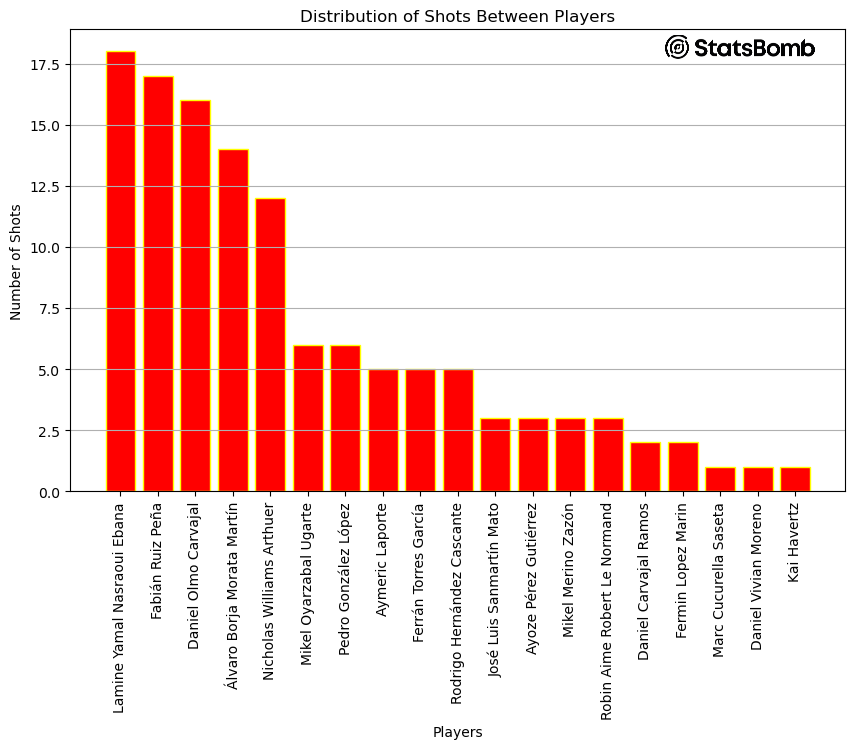

In [182]:
# Count the number of shots per player and sort in descending order
spanish_shots = spanish_shots_raw['player'].value_counts().sort_values(ascending=False)

# Create a bar plot using Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(spanish_shots.index, spanish_shots.values, color='red', edgecolor='yellow')
plt.title('Distribution of Shots Between Players')
plt.xlabel('Players')
plt.ylabel('Number of Shots')
plt.xticks(rotation=90)  # Rotate x-axis labels to be vertical
plt.grid(axis='y')

# Load the logo image and add it to the plot
logo = mpimg.imread('/Users/adhamgalal/Documents/Galal Footy/SB - Icon Lockup - Mono Black.png')  # Update this path
logo_ax = fig.add_axes([0.72, 0.72, 0.15, 0.15], anchor='NE', zorder=1)  # Position the logo
logo_ax.imshow(logo)
logo_ax.axis('off')  # Hide axes for the logo

plt.show()

/var/folders/y5/xm1h7jfd2t1_v7_q5vktk3d40000gn/T/ipykernel_32474/1377079892.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spanish_shots_raw[['x', 'y']] = pd.DataFrame(spanish_shots_raw['location'].tolist(), index=spanish_shots_raw.index)
/var/folders/y5/xm1h7jfd2t1_v7_q5vktk3d40000gn/T/ipykernel_32474/1377079892.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spanish_shots_raw['distance_to_goal_left'] = np.sqrt((spanish_shots_raw['x'] - goal_left[0])**2 + (spanish_shots_raw['y'] - goal_left[1])**2

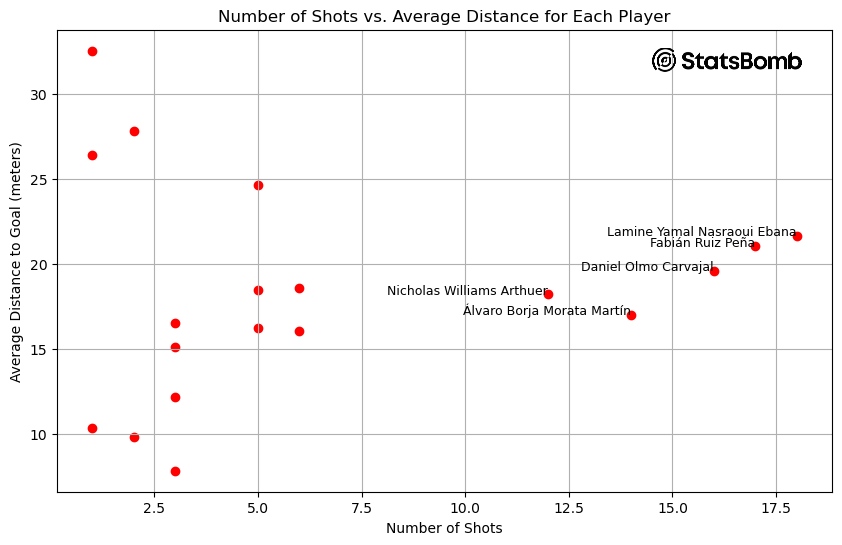

In [176]:
# Define goal locations
goal_left = (0, 40)
goal_right = (120, 40)

# Extract x and y coordinates from 'location'
spanish_shots_raw[['x', 'y']] = pd.DataFrame(spanish_shots_raw['location'].tolist(), index=spanish_shots_raw.index)

# Calculate distance to both goals
spanish_shots_raw['distance_to_goal_left'] = np.sqrt((spanish_shots_raw['x'] - goal_left[0])**2 + (spanish_shots_raw['y'] - goal_left[1])**2)
spanish_shots_raw['distance_to_goal_right'] = np.sqrt((spanish_shots_raw['x'] - goal_right[0])**2 + (spanish_shots_raw['y'] - goal_right[1])**2)

# Get the minimum distance to goal
spanish_shots_raw['distance_to_goal'] = spanish_shots_raw[['distance_to_goal_left', 'distance_to_goal_right']].min(axis=1)

# Group by player to get the number of shots and average distance
player_stats = spanish_shots_raw.groupby('player').agg(
    num_shots=('distance_to_goal', 'size'),
    avg_distance=('distance_to_goal', 'mean')
).reset_index()

# Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(player_stats['num_shots'], player_stats['avg_distance'], color='red')

players_to_label = ['Lamine Yamal Nasraoui Ebana', 'Fabián Ruiz Peña', 'Daniel Olmo Carvajal', 'Álvaro Borja Morata Martín', 'Nicholas Williams Arthuer']

# Add labels for each point
for i in range(player_stats.shape[0]):
     if player_stats['player'].iloc[i] in players_to_label:
        plt.text(player_stats['num_shots'].iloc[i], player_stats['avg_distance'].iloc[i], 
                 player_stats['player'].iloc[i], fontsize=9, ha='right')

# Add labels and title
plt.title('Number of Shots vs. Average Distance for Each Player')
plt.xlabel('Number of Shots')
plt.ylabel('Average Distance to Goal (meters)')
plt.grid(True)

# Load the logo image and add it to the plot
logo = mpimg.imread('/Users/adhamgalal/Documents/Galal Footy/SB - Icon Lockup - Mono Black.png')  # Update this path
logo_ax = fig.add_axes([0.72, 0.70, 0.15, 0.15], anchor='NE', zorder=1)  # Position the logo
logo_ax.imshow(logo)
logo_ax.axis('off')  # Hide axes for the logo

# Show the plot
plt.show()

In [ ]:
## Aggregated events
events = sb.competition_events(
    country="Europe",
    division= "UEFA Euro",
    season="2024",
    gender="male"
)

grouped_events = sb.competition_events(
    country="Europe",
    division= "UEFA Euro",
    season="2024",
    split=True
)
grouped_events["shots"]

In [150]:
spanish_shots_raw.loc[(spanish_shots_raw['player'] == 'Kai Havertz')]['minute']

10782    81
Name: minute, dtype: int64

In [146]:
euro_matches.loc[(euro_matches['match_id'] ==3942226)]

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
8,3942226,2024-07-05,19:00:00.000,Europe - UEFA Euro,2024,Spain,Germany,2,1,available,...,2024-07-13T03:52:43.383929,5,Quarter-finals,MHPArena,Anthony Taylor,Luis de la Fuente Castillo,Julian Nagelsmann,1.1.0,2,2
